In [1]:
#!pip install -U statsmodels

In [2]:
#!pip install pmdarima

In [3]:
#pip install scikit-learn

In [4]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
import pmdarima as pm
import pandas as pd
import matplotlib as mpl
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import matplotlib.pyplot as plt

### Lendo e plotando o dataframe

In [5]:
df = pd.read_csv(r'C:\Users\gabri\Desktop\Git - Tcc\df_casos_leves')
df

C:\Users\gabri\AppData\Local\Temp\ipykernel_19568\3450452656.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\gabri\Desktop\Git - Tcc\df_casos_leves')


,Unnamed: 0,sexo,data_notificacao,idade,data_inicio_sintomas,sintomas,outros_sintomas,classificacao_final,resultado_final,bairro,...,SYMPTOM_BODY_PAIN,SYMPTOM_DIARRHEA,SYMPTOM_RUNNY_NOSE,SYMPTOM_NOSE_CONGESTION,SYMPTOM_WEAKNESS,SYMPTOM_ANOSMIA_OR_HYPOSMIA,SYMPTOM_NAUSEA,SYMPTOM_LACK_OF_APPETITE,SYMPTOM_ABDOMINAL_PAIN,SYMPTOM_CONSCIOUSNESS_DEGRADATION
0,0,1,2020-01-12,28,2020-01-12,['ASSINTOMÁTICO'],[],7,4,SANCHO,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2020-01-20,36,2020-01-20,['ASSINTOMÁTICO'],[],7,2,ROSARINHO,...,0,0,0,0,0,0,0,0,0,0
2,2,0,2020-01-20,45,2020-01-20,['ASSINTOMÁTICO'],[],7,2,CASA AMARELA,...,0,0,0,0,0,0,0,0,0,0
3,3,1,2020-01-20,58,2020-01-20,['ASSINTOMÁTICO'],[],7,2,ROSARINHO,...,0,0,0,0,0,0,0,0,0,0
4,4,0,2020-01-22,33,2020-01-22,['ASSINTOMÁTICO'],[],7,2,IPUTINGA,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889840,889840,0,2022-01-23,27,2022-01-23,['OUTROS'],['PRÉ-CIRÚRGICO'],7,4,CAMPO GRANDE,...,0,0,0,0,0,0,0,0,0,0
889841,889841,1,2022-01-23,26,2022-01-23,['OUTROS'],['PRÉ-CIR´ÚRGICO'],7,4,IBURA,...,0,0,0,0,0,0,0,0,0,0
889842,889842,0,2022-01-23,38,2022-01-23,['ASSINTOMÁTICO'],['0'],7,4,COHAB,...,0,0,0,0,0,0,0,0,0,0
889843,889843,0,2022-01-23,26,2022-01-16,"['CORIZA', 'DOR DE CABEÇA', 'DOR DE GARGANTA',...",['0'],7,4,POCO,...,0,0,1,0,0,0,0,0,0,0


In [6]:
df_st = df['data_notificacao'].value_counts().rename_axis('Data_notificacao').to_frame('N_casos')
df_st.sort_index(inplace = True)
df_st

,N_casos
Data_notificacao,
2020-01-12,1
2020-01-20,3
2020-01-22,1
2020-01-24,1
2020-01-25,1
...,...
2022-06-17,1327
2022-06-18,550
2022-06-19,552


Média do número de casos 

In [7]:
df_st['N_casos'].mean()

1083.855054811206

<AxesSubplot:xlabel='Data_notificacao'>

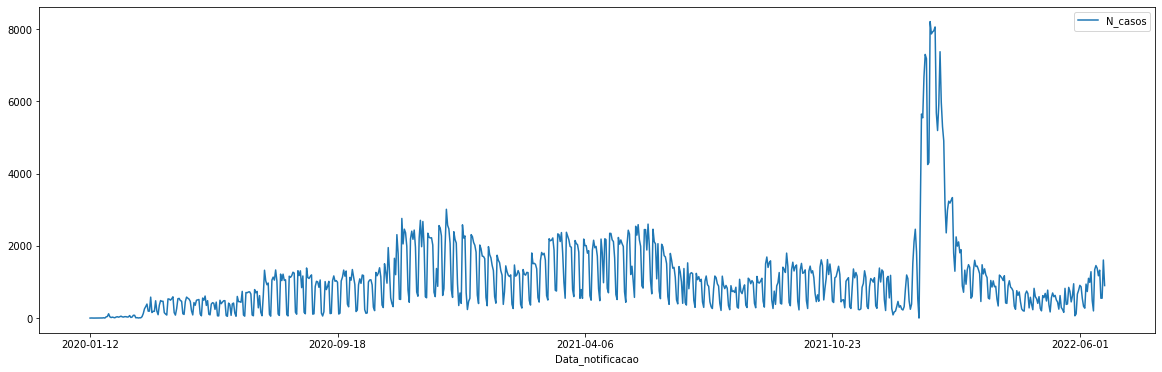

In [8]:
df_st.plot(figsize=(20,6))

Periodo com mais de 4000 casos por dia (24/01/22 à 11/02/22)

In [9]:
df_st[df_st['N_casos'] > 4000 ]

,N_casos
Data_notificacao,
2022-01-24,5651
2022-01-25,5547
2022-01-26,6672
2022-01-27,7302
2022-01-28,7185
2022-01-29,4253
2022-01-30,4308
2022-01-31,8212
2022-02-01,7870


<AxesSubplot:ylabel='Frequency'>

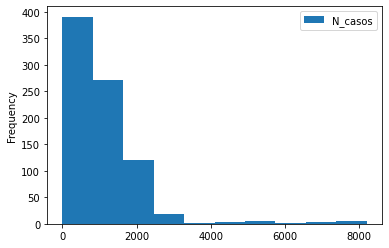

In [10]:
df_st.plot.hist()

## Verificando tendencias e sazonalidade

Peridodo de 30 dias

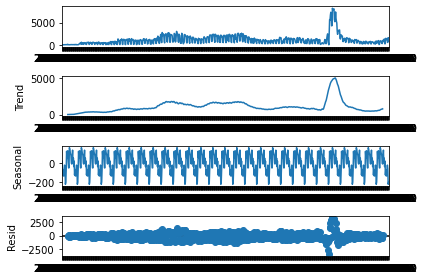

In [11]:
df_decomp = tsa.seasonal_decompose(df_st, period = 30)
df_decomp.plot();

Periodo de 60 dias

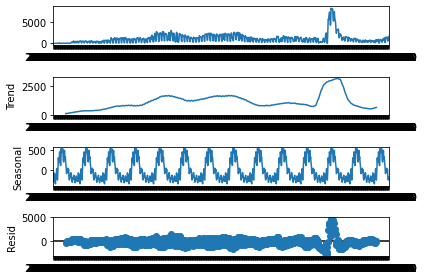

In [12]:
df_decomp = tsa.seasonal_decompose(df_st, period = 60)
df_decomp.plot();

peridodo de 180 dias

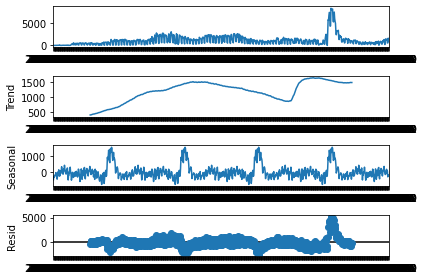

In [13]:
df_decomp = tsa.seasonal_decompose(df_st, period = 180)
df_decomp.plot();

### Verificando estacionaridade da série e a média movel

<AxesSubplot:xlabel='Data_notificacao'>

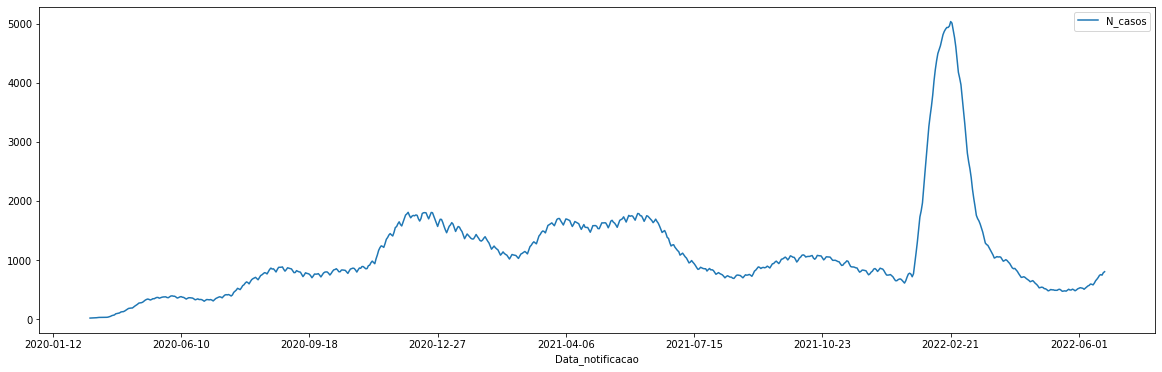

In [14]:
df_st.rolling(30).mean().plot(figsize=(20,6))

<AxesSubplot:xlabel='Data_notificacao'>

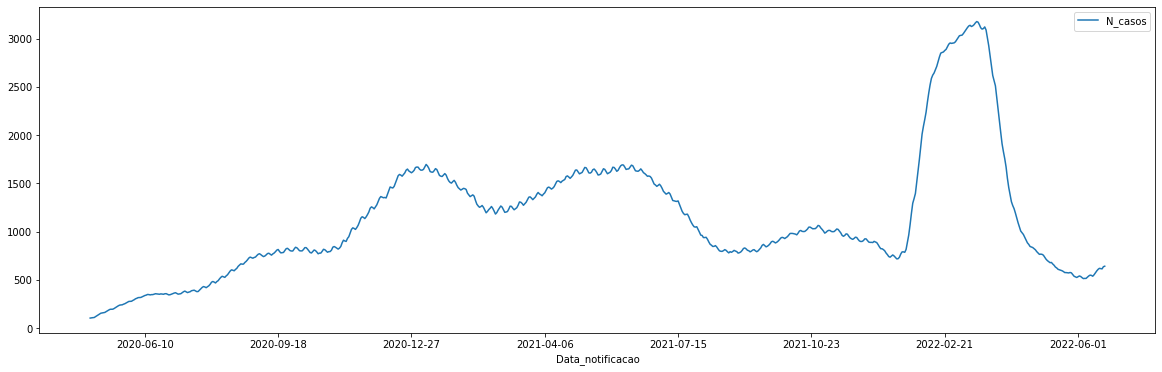

In [15]:
df_st.rolling(60).mean().plot(figsize=(20,6))

<AxesSubplot:xlabel='Data_notificacao'>

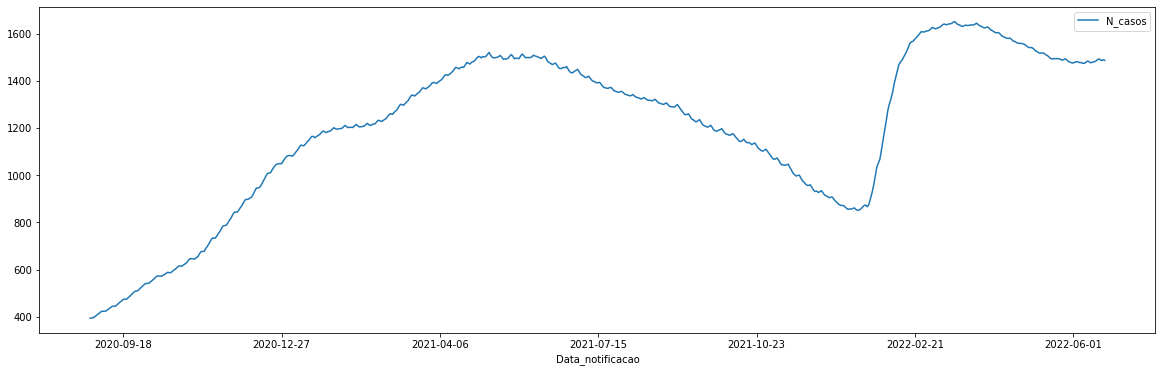

In [16]:
df_st.rolling(180).mean().plot(figsize=(20,6))

A série apresenta tendencia significativa não sendo estacionária

### Diferenciando a série para torna-la estacionária e poder aplicar os modelos

Diferenciação de primeira ordem

In [17]:
df_dif = df_st.diff(1)

<AxesSubplot:xlabel='Data_notificacao'>

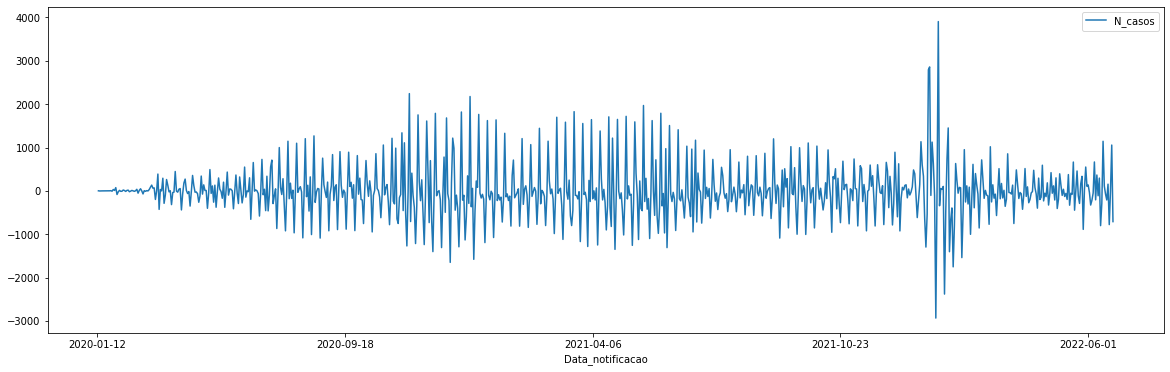

In [18]:
df_dif.plot(figsize=(20,6))

<AxesSubplot:ylabel='Frequency'>

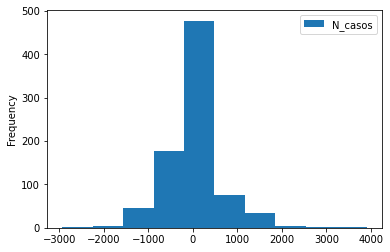

In [19]:
df_dif.plot.hist()

Na primeira diferenciação a série mostrou-se aproximadamente normal e com distribuição simétrica dos dados

#### Dickey-Fuller test

Teste para verificar a estacionaridade da série

In [20]:
test, pvalue, lags, obs, critic, ic = tsa.stattools.adfuller(df_st, regression='ct')
print(pvalue)
print(lags)

0.002969582869138721
21


O teste Dickey-Fuller (ADF) rejeita a hipótese nula de não estacionaridade usando 21 lags, o p-valor foi inferior 1%, portanto há evidência estatística de que a série é estacionária.

### Autocorrelação

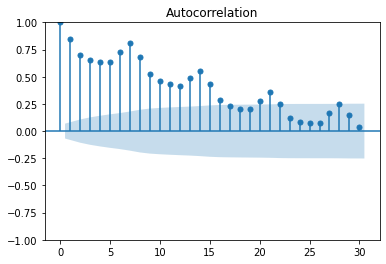

In [21]:
plot_acf(df_st);

A série apresenta um autocorrelação (correlação com ela mesma) significativa de 22 lags. Número de lags sugeridos para ser usado no modelo MA

### Autocorrelação parcial

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


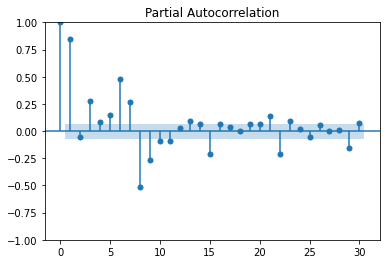

In [22]:
plot_pacf(df_st);

A autocorrelação parcial é feita para verificar a correlação dela com ela mesma sem influência dos lags próximos, o número de lags significativos foi 18. Número de lags utilizados para testar o modelo AR

## Aplicação dos modelos para série temporal

In [23]:
df_st2 = df_st.reset_index()
df_st2 = df_st2.drop('Data_notificacao', 1)
df_st2

C:\Users\gabri\AppData\Local\Temp\ipykernel_19568\584495884.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_st2 = df_st2.drop('Data_notificacao', 1)


,N_casos
0,1
1,3
2,1
3,1
4,1
...,...
816,1327
817,550
818,552
819,1609


### Modelo ARIMA

A série foi separada em 80% dos dados para treino e 20% dos dados para teste, os valores foram separados levando em consideração sua ordem.

In [24]:
df_train = df_st2.iloc[:int(len(df_st2) * 0.8)]
df_test = df_st2.iloc[int(len(df_st2) * 0.8):]

In [25]:
print(len(df_train),len(df_test))

656 165


Para aplicação do modelo, utilizou a função do ARIMA com p=22, d=1 e q=18

In [26]:
df_arima =  ARIMA(df_train, order=(22,0,18))
res = df_arima.fit()
res.summary()

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                N_casos   No. Observations:                  656
Model:               ARIMA(22, 0, 18)   Log Likelihood               -4614.575
Date:                Thu, 20 Oct 2022   AIC                           9313.151
Time:                        22:52:38   BIC                           9501.569
Sample:                             0   HQIC                          9386.203
                                - 656                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        961.0197    417.466      2.302      0.021     142.802    1779.237
ar.L1          0.8308      1.545      0.538      0.591      -2.198       3.859
ar.L2          0.1238      1.524      0.081      0.935      -2.863       3.110
ar.L3         -0.6746      1.072     -0.629      0.529      -2.776       1.427
ar.L4          0.1574      1.607      0.098      0.922      -2.993       3.308
ar.L5          0.3571      0.927      0.385      0.700      -1.461       2.175
ar.L6         -0.2293      1.347     -0.170      0.865      -2.869       2.410
ar.L7          0.5371      0.831      0.646      0.518      -1.092       2.166
ar.L8         -0.4560      0.428     -1.065      0.287      -1.295       0.383
ar.L9         -0.2905      0.962     -0.302      0.763      -2.176       1.595
ar.L10         0.7048      0.632      1.115      0.265      -0.534       1.944
ar.L11         0.0797      1.488      0.054      0.957      -2.837       2.996
ar.L12        -0.5438      0.866     -0.628      0.530      -2.241       1.154
ar.L13         0.4101      1.530      0.268      0.789      -2.589       3.409
ar.L14         0.2620      0.916      0.286      0.775      -1.532       2.056
ar.L15        -0.3097      1.252     -0.247      0.805      -2.763       2.144
ar.L16         0.1590      0.903      0.176      0.860      -1.611       1.929
ar.L17        -0.0473      0.588     -0.080      0.936      -1.201       1.106
ar.L18        -0.2221      0.488     -0.455      0.649      -1.178       0.734
ar.L19         0.1581      0.177      0.892      0.372      -0.189       0.505
ar.L20        -0.1494      0.206     -0.725      0.469      -0.554       0.255
ar.L21         0.1474      0.263      0.560      0.575      -0.368       0.663
ar.L22        -0.0364      0.203     -0.179      0.858      -0.435       0.362
ma.L1         -0.4205      1.543     -0.273      0.785      -3.445       2.604
ma.L2         -0.2237      1.058     -0.211      0.832      -2.297       1.849
ma.L3          0.5636      1.090      0.517      0.605      -1.573       2.700
ma.L4          0.1320      1.224      0.108      0.914      -2.268       2.532
ma.L5         -0.2887      1.042     -0.277      0.782      -2.331       1.754
ma.L6          0.2624      1.093      0.240      0.810      -1.880       2.405
ma.L7         -0.2404      0.634     -0.379      0.704      -1.483       1.002
ma.L8          0.2656      0.402      0.660      0.509      -0.523       1.054
ma.L9          0.3309      0.746      0.444      0.657      -1.131       1.793
ma.L10        -0.3467      0.604     -0.574      0.566      -1.531       0.837
ma.L11        -0.1977      0.908     -0.218      0.828      -1.978       1.582
ma.L12         0.4074      0.690      0.590      0.555      -0.946       1.761
ma.L13        -0.1740      1.090     -0.160      0.873      -2.311       1.963
ma.L14        -0.2744      0.582     -0.472      0.637      -1.414       0.865
ma.L15         0.1589      0.944      0.168      0.866      -1.692       2.010
ma

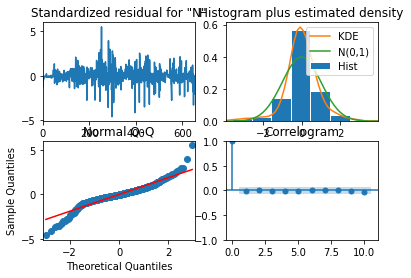

In [27]:
res.plot_diagnostics();

A curva dos residuos é aproximadamente normal, porem alguns pontos quantitativos estão fota da reta podendo existir viéses e há uma lag com significativa correlação

In [28]:
res2 = res.apply(df_test)
res2.predict()

656     961.019670
657     413.595637
658     405.959946
659     461.304525
660     811.319164
          ...     
816    1165.507962
817     693.817685
818     661.311687
819    1224.427948
820    1464.189532
Name: predicted_mean, Length: 165, dtype: float64

In [29]:
plt.rcParams["figure.figsize"] = (20,6)

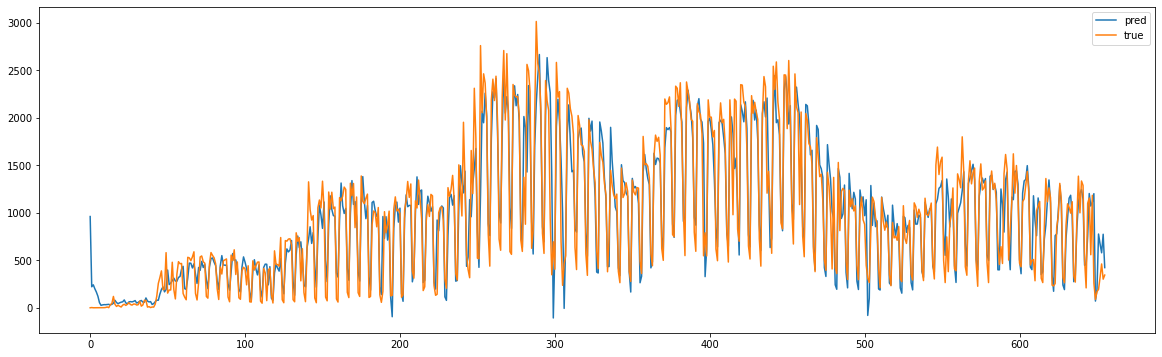

In [30]:
fig, ax = plt.subplots()
ax.plot(res.predict(), label='pred')
ax.plot(df_train, label='true')
plt.legend()

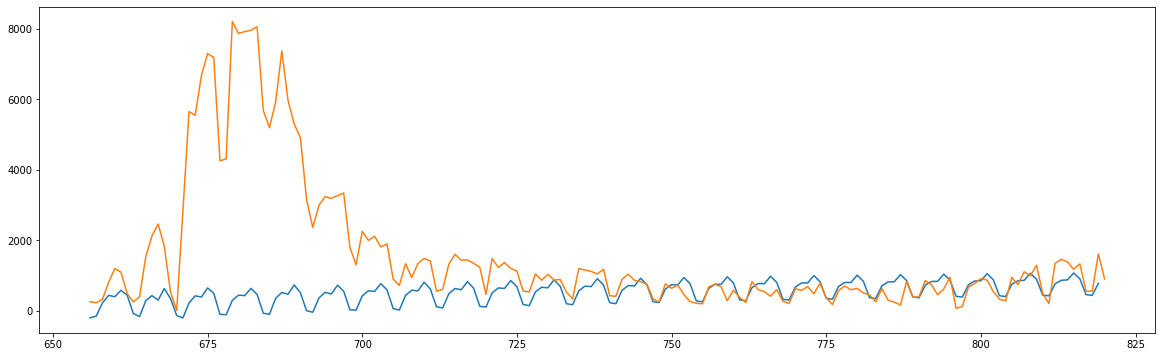

In [31]:
fig, ax = plt.subplots()
ax.plot(pd.concat([res.forecast(int(len(df_st2)*0.2)), df_test],axis=1))

A predição para vários passos a frente se torna não significativa

### Métricas do modelo

Criando um dicionário para comparar as métricas dos modelos

In [32]:
results = {}

Métricas Arima

In [33]:
print('Resultados do Modelo ARIMA\n')
print('R2' ,r2_score(res2.predict(), df_test))
print('MSE' ,mean_squared_error(res2.predict(), df_test))
print('MAE', mean_absolute_error(res2.predict(), df_test))
print('MAPE', mean_absolute_percentage_error(res2.predict(), df_test))

results['ARIMA'] = {'r2':r2_score(res2.predict(), df_test),
                 'mse': mean_squared_error(res2.predict(), df_test), 
                 'mae': mean_absolute_error(res2.predict(), df_test),
                 'mape': mean_absolute_percentage_error(res2.predict(), df_test)}

Resultados do Modelo ARIMA

R2 0.7794796216053453
MSE 695320.0326664884
MAE 472.2424029903699
MAPE 0.5659690445103939


### Modelo Auto Arima (22,2,18)

##### Desconsiderando a sazonalidade

O modelo AutoArima foi uitlizado no intuito de verificar qual o ajuste de parametros melhor se adequal ao ARIMA, o modelo que apresenta menor ordem (soma de p + d + q) com melhores resultados é o modelo que deve ser utilizado. 

p = AR
d = diferenciação
q = MA

Auto arima faz uma busca em grade pela melhor ordem para o modelo:
p = [0, 22]
d = [0, 2]
q = [0, 18]

In [34]:
df_arima = pm.auto_arima(df_st2, max_ar=22, max_ma=18, max_d=2, seasonal=False, trace=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12556.015, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12848.767, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12849.933, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12848.037, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12846.770, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12692.496, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12677.498, Time=0.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12497.792, Time=0.72 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12685.843, Time=0.47 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=12718.776, Time=0.97 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=12496.809, Time=1.06 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=12585.399, Time=0.56 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=12520.267, Time=1.14 sec
 ARIMA(2,1,5)(0,0,0)[0] i

In [35]:
df_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  821
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -6067.714
Date:                Thu, 20 Oct 2022   AIC                          12157.427
Time:                        22:52:58   BIC                          12209.230
Sample:                             0   HQIC                         12177.304
                                - 821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5203      0.084      6.167      0.000       0.355       0.686
ar.L2         -1.2128      0.072    -16.944      0.000      -1.353      -1.073
ar.L3          0.4047      0.121      3.341      0.001       0.167       0.642
ar.L4         -0.7602      0.070    -10.804      0.000      -0.898      -0.622
ar.L5         -0.2654      0.084     -3.173      0.002      -0.429      -0.101
ma.L1         -0.8501      0.081    -10.452      0.000      -1.010      -0.691
ma.L2          1.3305      0.078     16.997      0.000       1.177       1.484
ma.L3         -0.8896      0.105     -8.507      0.000      -1.095      -0.685
ma.L4          0.8848      0.067     13.159      0.000       0.753       1.017
ma.L5         -0.1750      0.064     -2.734      0.006      -0.300      -0.050
sigma2       1.97e+05   6465.439     30.469      0.000    1.84e+05     2.1e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3897.42
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.83   Skew:                             1.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

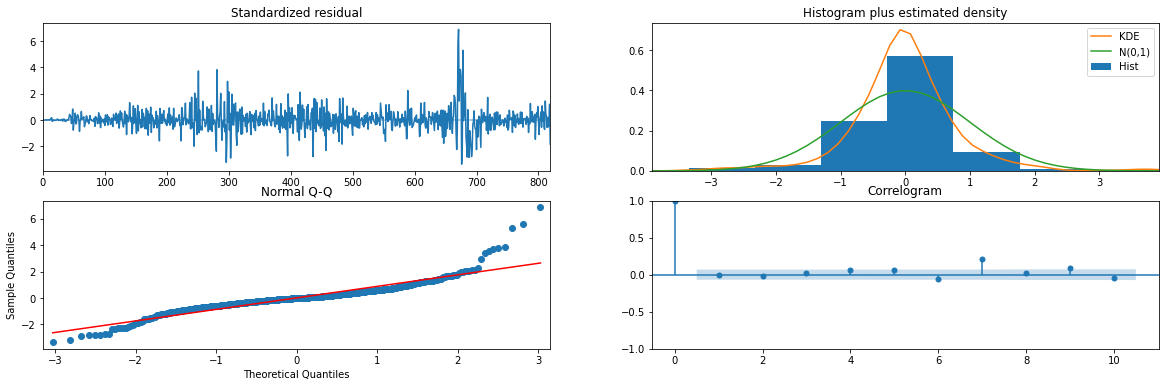

In [36]:
df_arima.plot_diagnostics();

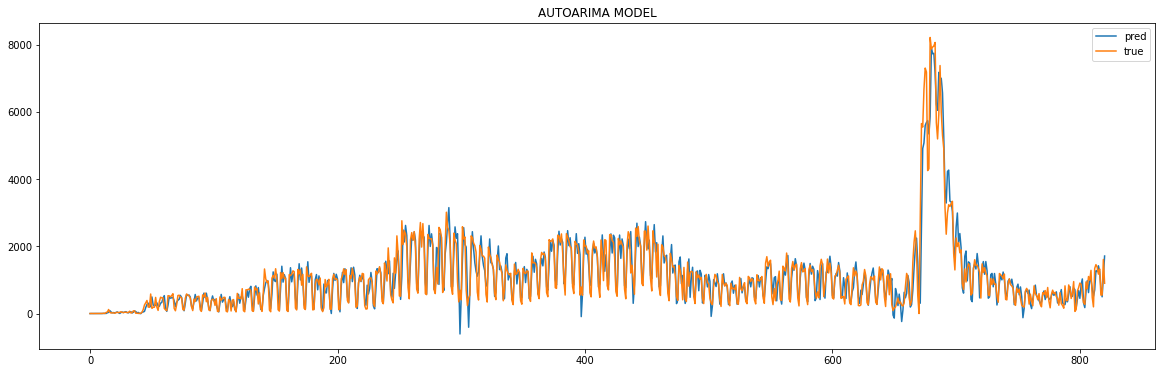

In [37]:
fig, ax = plt.subplots()
ax.plot(df_arima.predict_in_sample(), label='pred')
ax.plot(df_st2.values, label='true')
plt.title('AUTOARIMA MODEL')
plt.legend()

In [38]:
print('AUTOARIMA model Results')
print('r2' ,r2_score(df_arima.predict_in_sample(), df_st2))
print('mse' ,mean_squared_error(df_arima.predict_in_sample(), df_st2))
print('mae', mean_absolute_error(df_arima.predict_in_sample(), df_st2))
print('MAPE', mean_absolute_percentage_error(df_arima.predict_in_sample(), df_st2))

results['AUTOARIMA'] = {'r2':r2_score(df_arima.predict_in_sample(), df_st2),
                 'mse': mean_squared_error(df_arima.predict_in_sample(), df_st2), 
                 'mae': mean_absolute_error(df_arima.predict_in_sample(), df_st2),
                 'mape': mean_absolute_percentage_error(df_arima.predict_in_sample(), df_st2)}

AUTOARIMA model Results
r2 0.8662017809543352
mse 150147.44460757656
mae 246.6953828391995
MAPE 5485505027248.356


### Modelo Auto Sarima

Devido a presença de uma sazonalidade na série deve-se testar o modelo sarima, que considera a sazonalidade da série utilizando oa seguintes parametros (p,d,q)(P,D,Q,s), no qual os ultimos parametros indicam o número de termos autoregressíveis.

Para o seguinte modelo foram considerados os valores:

max_p = 22
max_d = 2
max_q = 18

max_P = 22
max_D = 2
max_Q = 18

In [39]:
df_sarima = pm.auto_arima(df_st2, max_p=22, max_d=2, max_q=18, max_P=22, max_D=2, max_Q=18, seasonal=True, trace=True, stepwise=True,suppress_warnings=True,error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12556.015, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12848.767, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12849.933, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12848.037, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12846.770, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12692.496, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12677.498, Time=0.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12497.792, Time=0.73 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12685.843, Time=0.47 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=12718.776, Time=0.98 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=12496.809, Time=1.04 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=12585.399, Time=0.55 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=12520.267, Time=1.14 sec
 ARIMA(2,1,5)(0,0,0)[0] i

In [40]:
df_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  821
Model:               SARIMAX(9, 1, 8)   Log Likelihood               -6001.418
Date:                Thu, 20 Oct 2022   AIC                          12038.835
Time:                        22:54:15   BIC                          12123.603
Sample:                             0   HQIC                         12071.361
                                - 821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3323      0.059      5.609      0.000       0.216       0.448
ar.L2         -0.1077      0.054     -2.002      0.045      -0.213      -0.002
ar.L3         -0.1551      0.023     -6.826      0.000      -0.200      -0.111
ar.L4         -0.1676      0.022     -7.551      0.000      -0.211      -0.124
ar.L5         -0.1582      0.023     -6.804      0.000      -0.204      -0.113
ar.L6         -0.1614      0.023     -7.018      0.000      -0.206      -0.116
ar.L7          0.8119      0.024     33.930      0.000       0.765       0.859
ar.L8         -0.4811      0.053     -9.140      0.000      -0.584      -0.378
ar.L9         -0.0668      0.042     -1.578      0.115      -0.150       0.016
ma.L1         -0.5891      0.057    -10.302      0.000      -0.701      -0.477
ma.L2          0.0424      0.046      0.920      0.358      -0.048       0.133
ma.L3          0.0659      0.031      2.115      0.034       0.005       0.127
ma.L4          0.2150      0.032      6.819      0.000       0.153       0.277
ma.L5          0.0388      0.028      1.372      0.170      -0.017       0.094
ma.L6          0.1919      0.030      6.358      0.000       0.133       0.251
ma.L7         -0.6240      0.028    -22.021      0.000      -0.680      -0.568
ma.L8          0.6467      0.033     19.732      0.000       0.582       0.711
sigma2      1.442e+05   3837.906     37.575      0.000    1.37e+05    1.52e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):              3323.30
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               3.41   Skew:                             1.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

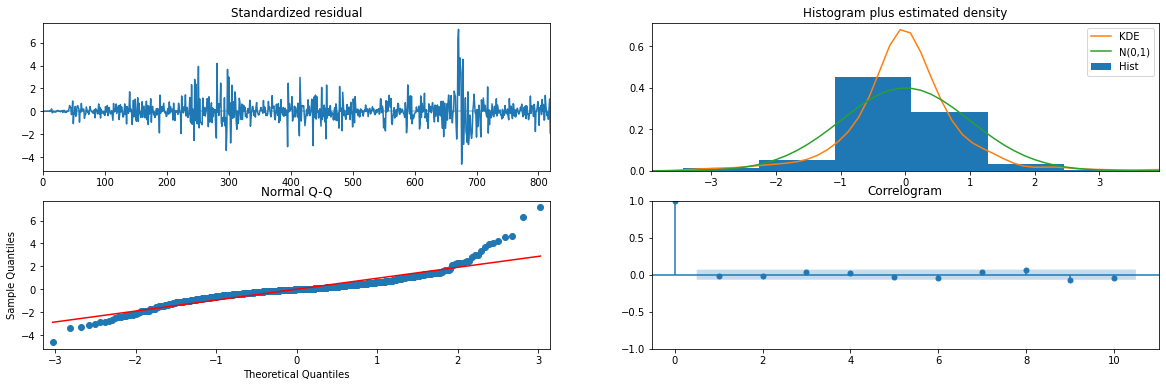

In [41]:
df_sarima.plot_diagnostics();

In [42]:
res2 = res.apply(df_test)
res2.predict()

656     961.019670
657     413.595637
658     405.959946
659     461.304525
660     811.319164
          ...     
816    1165.507962
817     693.817685
818     661.311687
819    1224.427948
820    1464.189532
Name: predicted_mean, Length: 165, dtype: float64

In [43]:
print('SARIMA model Results')
print('r2' ,r2_score(df_sarima.predict_in_sample(),df_st2))
print('mse' ,mean_squared_error(df_sarima.predict_in_sample(), df_st2))
print('mae', mean_absolute_error(df_sarima.predict_in_sample(), df_st2))
print('MAPE', mean_absolute_percentage_error(df_sarima.predict_in_sample(), df_st2))

results['SARIMA'] = {'r2':r2_score(df_sarima.predict_in_sample(), df_st2),
                 'mse': mean_squared_error(df_sarima.predict_in_sample(), df_st2), 
                 'mae': mean_absolute_error(df_sarima.predict_in_sample(), df_st2),
                 'mape': mean_absolute_percentage_error(df_sarima.predict_in_sample(), df_st2)}

SARIMA model Results
r2 0.8883643815360611
mse 131009.00837427973
mae 225.8745215398787
MAPE 5485505027248.321


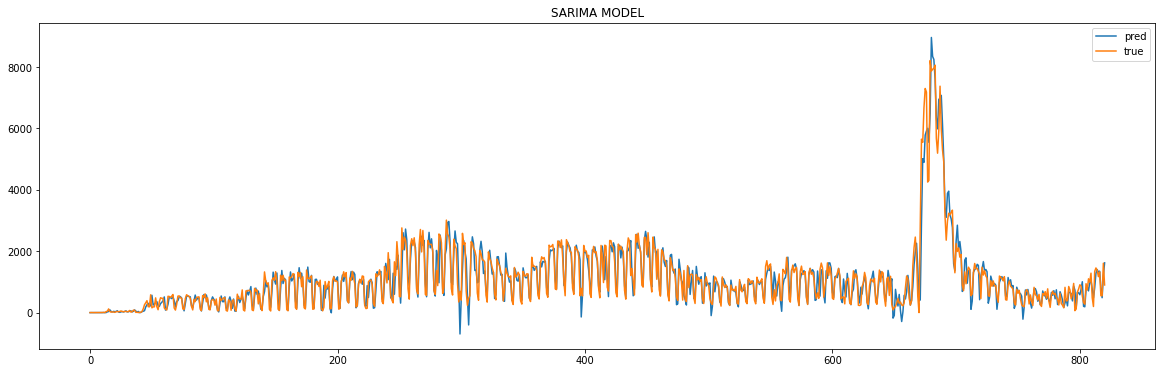

In [44]:
fig, ax = plt.subplots()
ax.plot(df_sarima.predict_in_sample(), label='pred')
ax.plot(df_st2, label='true')
plt.title('SARIMA MODEL')
plt.legend()

In [45]:
pd.DataFrame(results)

,ARIMA,AUTOARIMA,SARIMA
r2,0.779480,8.662018e-01,8.883644e-01
mse,695320.032666,1.501474e+05,1.310090e+05
mae,472.242403,2.466954e+02,2.258745e+02
mape,0.565969,5.485505e+12,5.485505e+12


## Aplicando outros Modelos

### Feature Engineering

Para aplicação dos modelos de aprendizado de maquinas se faz necessário o ajuste das features, sendo preciso criar um dataframe com as Lags da série, para isso foi definido a seguinte função.

In [46]:
def get_lags(series, lags):
  result = []
  if lags > 0:
    for lag in range(1, lags+1):
    #  print(lag)
    #  print(series.shift(lag))
      result.append(series.shift(lag).rename({series.columns[0]: series.columns[0]+'-'+str(lag)}, axis=1))
    #return result
    return pd.concat(result, axis=1, names=list(range(-1,-lags))).dropna()
  else:
    for lag in range(-1, lags-1,-1):
      #print(lag)
      #print(series.shift(lag))
      result.append(series.shift(lag).rename({series.columns[0]: series.columns[0]+'+'+str(abs(lag))}, axis=1))
    #return result
    return pd.concat(result, axis=1, names=list(range(+1,-lags))).dropna()

Aplicando para 16 lags por conta da autocorrelação

In [47]:
X = get_lags(df_st2, 16)

In [48]:
X.head()

,N_casos-1,N_casos-2,N_casos-3,N_casos-4,N_casos-5,N_casos-6,N_casos-7,N_casos-8,N_casos-9,N_casos-10,N_casos-11,N_casos-12,N_casos-13,N_casos-14,N_casos-15,N_casos-16
16,120.0,45.0,34.0,2.0,9.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0
17,37.0,120.0,45.0,34.0,2.0,9.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
18,15.0,37.0,120.0,45.0,34.0,2.0,9.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19,27.0,15.0,37.0,120.0,45.0,34.0,2.0,9.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
20,17.0,27.0,15.0,37.0,120.0,45.0,34.0,2.0,9.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0


In [49]:
y = df_st2.reindex(X.index)

In [50]:
y.head()

,N_casos
16,37
17,15
18,27
19,17
20,9


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=.3)
#X_valid, X_test, y_valid, y_test = train_test_split(X_train, y_train, shuffle=False, test_size=.5)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# print(X_valid.shape)
# print(y_valid.shape)

(563, 16)
(563, 1)
(242, 16)
(242, 1)


### KNN

Para aplicação dos modelos de machine leaning foi utilizado o Grid Search para ajuste dos hiperparametros e realizada a validação cruzada utilizando o Time Seires Split.

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

parameters = {'n_neighbors': range(1,20), 
            'weights': ['uniform','distance'], 
            'metric': ['euclidean','minkowski','manhattan']}

knn = KNeighborsRegressor()
knn_GS = GridSearchCV (knn, parameters, cv = TimeSeriesSplit())
res = knn_GS.fit(X_train,y_train)

print(res.best_score_,res.best_params_)

0.3752603134666511 {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}


O modelo não apresentou bons resultados de acurácia

In [53]:
print('KNN model Results')
print('r2' ,r2_score(knn_GS.predict(X_test),y_test))
print('mse' ,mean_squared_error(knn_GS.predict(X_test),y_test))
print('mae', mean_absolute_error(knn_GS.predict(X_test),y_test))
print('MAPE', mean_absolute_percentage_error(knn_GS.predict(X_test),y_test))

results['KNN'] = {'r2':r2_score(knn_GS.predict(X_test),y_test),
                 'mse': mean_squared_error(knn_GS.predict(X_test),y_test), 
                 'mae': mean_absolute_error(knn_GS.predict(X_test),y_test),
                 'mape': mean_absolute_percentage_error(knn_GS.predict(X_test),y_test)}

KNN model Results
r2 -5.932406599035908
mse 2072763.5679235538
mae 641.1621900826447
MAPE 0.6840090471688355


ALguma coisa está errada aqui, overfit

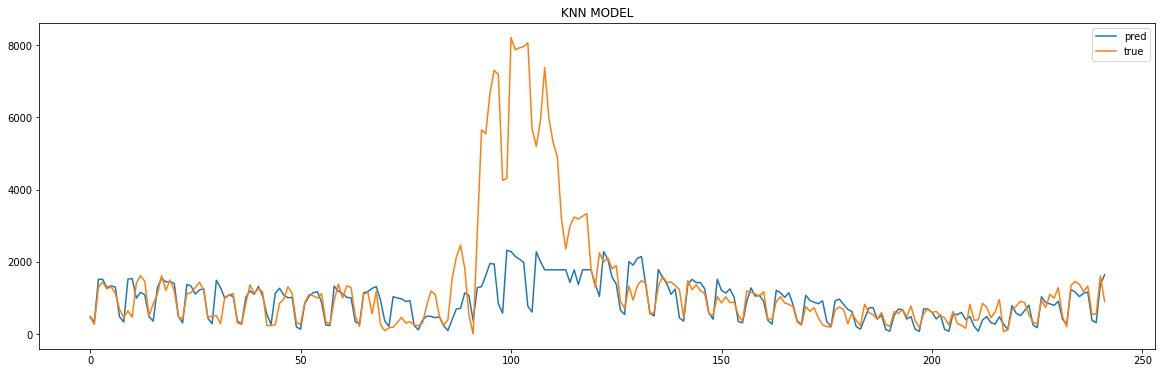

In [54]:
fig, ax = plt.subplots()
ax.plot(knn_GS.predict(X_test).flatten(), label='pred')
ax.plot(y_test.reset_index(drop=True), label='true')
plt.title('KNN MODEL')
plt.legend()

O modelo não se adequa aos dados, apresentando métricas ruins.

## SVR

Para o modelo SVR foram feitas 10 execuções do Grid Searsh, pois o modelo apresenta inicialização aleatória, por isso foi criado uma lista que salva os valores dos best_scores e best_params das execuções. Assim como o KNN foi utilizado a validação cruzada usando o Time Series Split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=.3)

In [56]:
from sklearn.svm import SVR

parameters = {'kernel':['linear', 'rbf', 'sigmoid'],
             'gamma': ['scale', 'auto'],
             'C': [0.1, 1, 10, 100]
             }

best_scores, best_params = [] , []

svr = SVR()
svr_GS = GridSearchCV (svr, parameters, cv = TimeSeriesSplit())
res = svr_GS.fit(X_train,y_train)

best_scores.append(res.best_score_)
best_params.append(res.best_params_)

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

In [57]:
index_best = best_scores.index(max(best_scores))

In [58]:
print(best_scores[index_best],'\n',
     best_params[index_best])

0.6916478228427323 
 {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [59]:
parameters = {'kernel':['linear'],
             'gamma': ['scale'],
             'C':[10],
             #'epsilon':[0.2]
             }
    
svr = SVR()
svr_GS = GridSearchCV (svr, parameters, cv = TimeSeriesSplit())
res = svr_GS.fit(X_train,y_train)
print( res.best_score_, res.best_params_)

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

0.6916478228427323 {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [60]:
print('SVR model Results')
print('r2' ,r2_score(svr_GS.predict(X_test),y_test))
print('mse' ,mean_squared_error(svr_GS.predict(X_test),y_test))
print('mae', mean_absolute_error(svr_GS.predict(X_test),y_test))
print('MAPE', mean_absolute_percentage_error(svr_GS.predict(X_test),y_test))

results['SVR'] = {'r2':r2_score(svr_GS.predict(X_test),y_test),
                 'mse': mean_squared_error(svr_GS.predict(X_test),y_test), 
                 'mae': mean_absolute_error(svr_GS.predict(X_test),y_test),
                 'mape': mean_absolute_percentage_error(svr_GS.predict(X_test),y_test)}

SVR model Results
r2 0.7287701361307983
mse 639443.167356151
mae 436.48676570494393
MAPE 0.38731001651974745


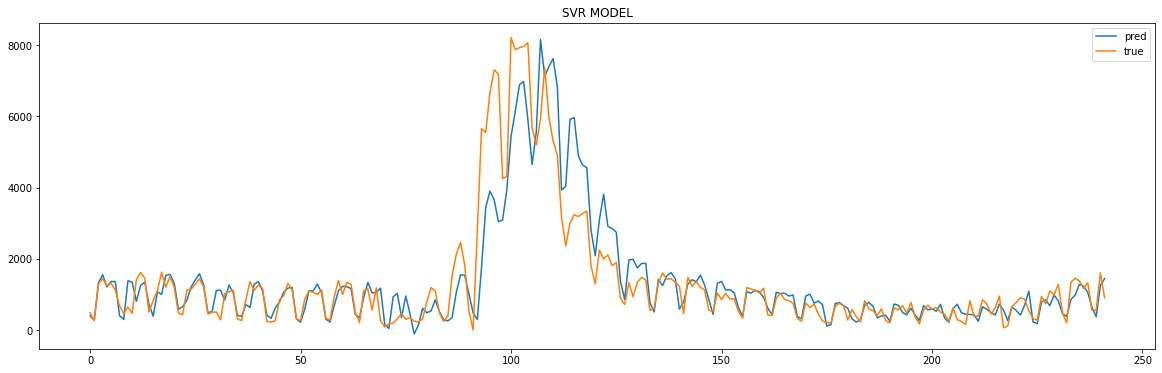

In [61]:
fig, ax = plt.subplots()
ax.plot(svr_GS.predict(X_test).flatten(), label='pred')
ax.plot(y_test.reset_index(drop=True), label='true')
plt.title('SVR MODEL')
plt.legend()

#### Residuos SVR

In [62]:
res = svr_GS.predict(X_test).flatten() - y_test.reset_index(drop=True).values.flatten()

<AxesSubplot:>

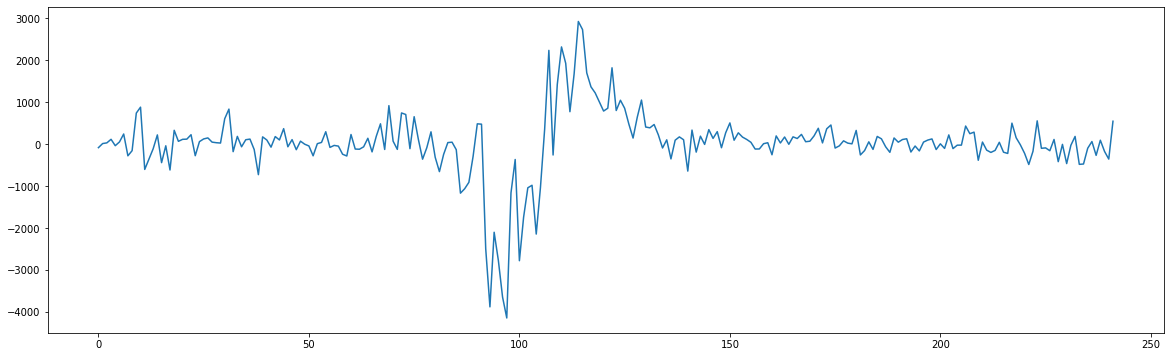

In [63]:
pd.Series(res).plot()

Distribuição dos residuos 

<AxesSubplot:ylabel='Density'>

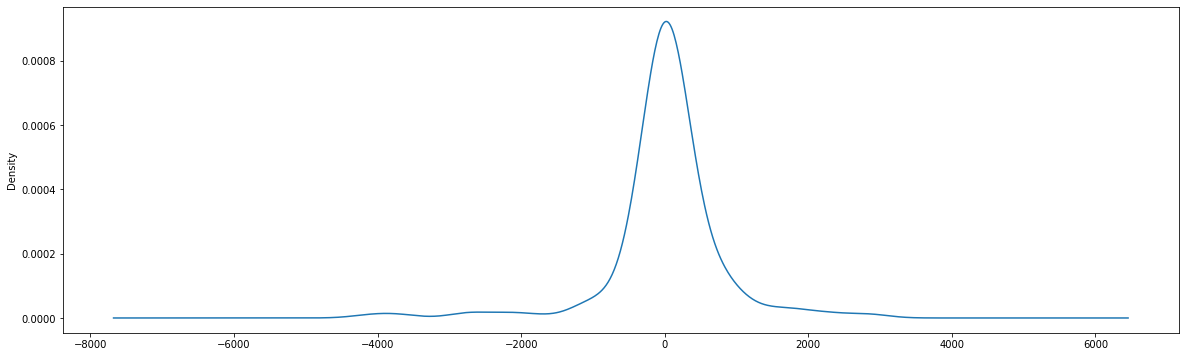

In [64]:
pd.Series(res).plot.kde()

distribuição normal dos ruidos

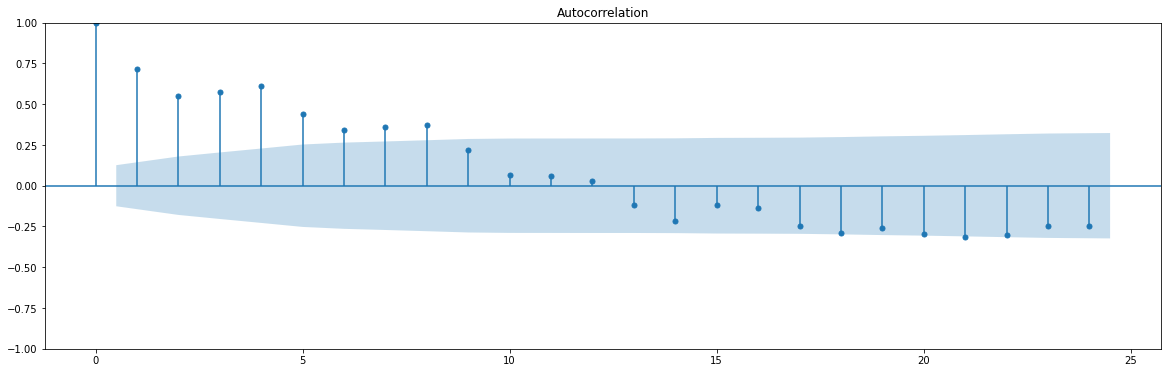

In [65]:
plot_acf(res);

apesar da distribuição normal dos ruidos ainda apresenta muitas lags significativas

In [67]:
pd.DataFrame(results)

,ARIMA,AUTOARIMA,SARIMA,KNN,SVR
r2,0.779480,8.662018e-01,8.883644e-01,-5.932407e+00,0.728770
mse,695320.032666,1.501474e+05,1.310090e+05,2.072764e+06,639443.167356
mae,472.242403,2.466954e+02,2.258745e+02,6.411622e+02,436.486766
mape,0.565969,5.485505e+12,5.485505e+12,6.840090e-01,0.387310
